In [1]:
import torch 
import torch.nn
from torch import nn
import numpy as np

In [18]:
from PIL import Image
def get_img():
    im = Image.open('test.png')

    im_array = np.vstack((np.expand_dims(np.asarray(im),0),np.expand_dims(np.asarray(im),0)))
    im_array.shape
    im_array = np.transpose(im_array,(0,3,1,2))
    im_array= im_array[:,:,0:49]
    im_array.shape
    im_array = torch.tensor(im_array)[:,0:3].to(torch.float32)
    
    return im_array

im_array = get_img()


In [21]:
im_array.shape

torch.Size([2, 3, 49, 64])

## Critic shapes

In [3]:
pool = nn.MaxPool2d(2)
colorchs = 3 
dims=[8, 8, 8, 16]
stride = 1
bottleneck=32
chfak=1 

print(im_array.shape)
im_array = nn.Conv2d(colorchs, dims[0], 3, stride, 1)(im_array)
print(im_array.shape)
im_array = pool(im_array)
print(im_array.shape)
im_array = nn.Conv2d(dims[0], dims[1], 3, stride, 1)(im_array)
print(im_array.shape)
im_array =pool((im_array))
print(im_array.shape)
im_array = nn.Conv2d(dims[1], dims[2], 3, stride, 1)(im_array)
print(im_array.shape)
im_array = pool(im_array)
print(im_array.shape)
im_array = nn.Conv2d(dims[2], dims[3], 3, stride, 1)(im_array)
print(im_array.shape)
#im_array = pool(im_array)
#print(im_array.shape)
im_array  = nn.Conv2d(dims[3], bottleneck * chfak, 4)(im_array)
print(im_array.shape)
im_array  = nn.Flatten()(im_array)
print(im_array.shape)
im_array = nn.Linear(480, chfak * bottleneck)(im_array)
print(im_array.shape)
im_array = nn.Linear(chfak * bottleneck, 1)(im_array)
print(im_array.shape)

torch.Size([2, 3, 49, 64])
torch.Size([2, 8, 49, 64])
torch.Size([2, 8, 24, 32])
torch.Size([2, 8, 24, 32])
torch.Size([2, 8, 12, 16])
torch.Size([2, 8, 12, 16])
torch.Size([2, 8, 6, 8])
torch.Size([2, 16, 6, 8])
torch.Size([2, 32, 3, 5])
torch.Size([2, 480])
torch.Size([2, 32])
torch.Size([2, 1])


In [4]:
dims=[32, 64, 128, 256]

In [5]:
X = get_img()
ch = 3 
k=3
step = 1
p =  1
CRAFTER_BOTTLENECK = 13312
latent_dim = 64


# encoder

print(X.shape)
X = nn.Conv2d(ch, dims[0], k, step, p)(X)
print(X.shape)
X = nn.Conv2d(dims[0], dims[0], 3, 2, 1)(X)
print(X.shape)
X = nn.Conv2d(dims[0], dims[1], k, step, p)(X)
print(X.shape)
X = nn.Conv2d(dims[1], dims[1], 3, 2, 1)(X)
print(X.shape)


mu = nn.Linear(CRAFTER_BOTTLENECK, latent_dim)(nn.Flatten()(X))
logvar = nn.Linear(CRAFTER_BOTTLENECK, latent_dim)(nn.Flatten()(X))

print('\tmu: ',mu.shape,'var: ',logvar.shape)



# decoder

# reparameterization same shape as mu itself
X = torch.zeros(2,latent_dim+1)
print(X.shape)
X = nn.Linear(latent_dim+1,CRAFTER_BOTTLENECK)(X)
print(X.shape)
X = X.view(-1,64,13,16)
print(X.shape)
X = torch.nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=3, stride=(2,3), padding=(1,8), dilation=1)(X)
print(X.shape)
X =  torch.nn.ConvTranspose2d(in_channels=32, out_channels=32, kernel_size=3, stride=(2,3), padding=(1,16), dilation=1)(X)
print(X.shape)
X =   nn.Conv2d(dims[0], ch, k, step, p) (X)
print(X.shape)

torch.Size([2, 3, 49, 64])
torch.Size([2, 32, 49, 64])
torch.Size([2, 32, 25, 32])
torch.Size([2, 64, 25, 32])
torch.Size([2, 64, 13, 16])
	mu:  torch.Size([2, 64]) var:  torch.Size([2, 64])
torch.Size([2, 65])
torch.Size([2, 13312])
torch.Size([2, 64, 13, 16])
torch.Size([2, 32, 25, 32])
torch.Size([2, 32, 49, 64])
torch.Size([2, 3, 49, 64])


In [6]:

print(X.shape)

k = 3 
ch = 3
step = 1
p= 1
dims=[32, 64, 128, 256]

torch.Size([2, 3, 49, 64])


In [7]:
X = get_img()

X=          nn.Conv2d(ch, dims[0], k, step, p)(X) 
print(X.shape)
X=          nn.BatchNorm2d(dims[0])(X)
print(X.shape)
X=          nn.MaxPool2d(2)(X)
print(X.shape)

X=            nn.Conv2d(dims[0], dims[1], k, step, p)(X)
print(X.shape)
X=            nn.BatchNorm2d(dims[1])(X)
print(X.shape)
X=            nn.MaxPool2d(2)(X)
print(X.shape)


X=            nn.Conv2d(dims[1], dims[2], k, step, p)(X)
print(X.shape)
X=           nn.BatchNorm2d(dims[2])(X)
print(X.shape)
#X=            nn.MaxPool2d(2)(X)
print(X.shape)


X=            nn.Conv2d(dims[2], dims[3], k, step, p)(X)
print(X.shape)
X=            nn.BatchNorm2d(dims[3])(X)
print(X.shape)
#X=            nn.MaxPool2d(2)(X)
print(X.shape)


torch.Size([2, 32, 49, 64])
torch.Size([2, 32, 49, 64])
torch.Size([2, 32, 24, 32])
torch.Size([2, 64, 24, 32])
torch.Size([2, 64, 24, 32])
torch.Size([2, 64, 12, 16])
torch.Size([2, 128, 12, 16])
torch.Size([2, 128, 12, 16])
torch.Size([2, 128, 12, 16])
torch.Size([2, 256, 12, 16])
torch.Size([2, 256, 12, 16])
torch.Size([2, 256, 12, 16])


In [8]:
X=  nn.Conv2d(dims[3], dims[2], k, step, p)(X)
print(X.shape)
X=             nn.Upsample(scale_factor=2)(X)
print(X.shape)
X=             nn.Conv2d(dims[2], dims[1], k, step, p)(X)
print(X.shape)
X=             nn.Upsample(scale_factor=2)(X)
print(X.shape)
X=             nn.Conv2d(dims[1], dims[0], k, step, p)(X)
print(X.shape)
#X=             nn.Upsample(scale_factor=2)(X)
print(X.shape)
X=             nn.Conv2d(dims[0], dims[0], k, step, p)(X)
print(X.shape)
#X=             nn.Upsample(scale_factor=2)(X)
print(X.shape)
X=             nn.Conv2d(dims[0], ch, k, step, p)(X)
print(X.shape)

torch.Size([2, 128, 12, 16])
torch.Size([2, 128, 24, 32])
torch.Size([2, 64, 24, 32])
torch.Size([2, 64, 48, 64])
torch.Size([2, 32, 48, 64])
torch.Size([2, 32, 48, 64])
torch.Size([2, 32, 48, 64])
torch.Size([2, 32, 48, 64])
torch.Size([2, 3, 48, 64])


In [9]:
X.shape

torch.Size([2, 3, 48, 64])

<AxesSubplot:>

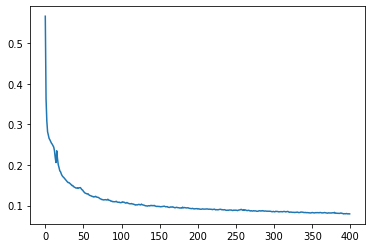

In [131]:
import pandas as pd

pd.read_csv('/home/olli/gits/Critic-VAE/log.csv')['total_loss'][:].plot()

In [52]:
pov = np.load('/home/olli/gits/Critic-VAE/pov.np.npy')
recon = np.load('/home/olli/gits/Critic-VAE/revon.np.npy')


In [29]:
im_array = get_img().numpy()[0]
im_array = im_array.squeeze().transpose(1,2,0)
im_array.shape

(49, 64, 3)

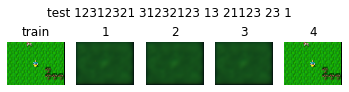

In [160]:
def plot_side_by_side(filename,ims, labels = None):
    import matplotlib.pyplot as plt


    f, axs = plt.subplots(1,len(ims))
    if labels == None:
        labels = range(len(ims))
    if len(labels) < len(ims):
        labels.extend(['none']*(len(ims)-len(labels)))
    
    for ax, im, label  in zip(axs,ims,labels[0:len(ims)]):
        im = im.squeeze().transpose(1,2,0)*255
        ax.imshow(im.astype(np.uint8))
        ax.title.set_text(str(label))
        ax.axis('off')
    f.suptitle('test 12312321 31232123 13 21123 23 1',y=0.7)
    plt.savefig(filename,bbox_inches='tight')
    
plot_side_by_side('test2.jpg',[pov,recon,recon,recon,pov],['train',1,2,3,4,5,6])

In [130]:
[1,2,3,4,5][0:2
           ]

[1]

In [141]:
x = torch.ones((3, 48, 64))
y = torch.ones((3, 48, 64))
torch.stack([x,y]).shape

torch.Size([2, 3, 48, 64])